In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice
daten = pd.read_csv('..\\daten\\BigmacPrice.csv', sep=',', header='infer')

In [3]:
type(daten)

pandas.core.frame.DataFrame

In [4]:
daten.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


In [5]:
daten.dtypes

date              object
currency_code     object
name              object
local_price      float64
dollar_ex          int64
dollar_price     float64
dtype: object

In [6]:
daten.columns = ['Datum', 'Währung', 'Land', 'Preis','DK', 'DP'] # Dollar-Kurs, Dollar-Preis

In [7]:
daten.head(n=1)

,Datum,Währung,Land,Preis,DK,DP
0,2000-04-01,ARS,Argentina,2.5,1,2.5


In [8]:
daten['Datum'] = pd.to_datetime(daten['Datum'], format='%Y-%m-%d')

# Lesen Sie die Dokumentation Python-datetime für mehr Info über format
# https://docs.python.org/3/library/datetime.html

In [9]:
daten.dtypes

Datum      datetime64[ns]
Währung            object
Land               object
Preis             float64
DK                  int64
DP                float64
dtype: object

In [10]:
print(daten.ndim)
print(daten.shape)
print(daten.size)

2
(1946, 6)
11676


In [11]:
daten.Land.head()

0    Argentina
1    Australia
2       Brazil
3      Britain
4       Canada
Name: Land, dtype: object

In [12]:
daten.Land.unique()

array(['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile',
       'China', 'Czech Republic', 'Denmark', 'Euro area', 'Hong Kong',
       'Hungary', 'Indonesia', 'Israel', 'Japan', 'Malaysia', 'Mexico',
       'New Zealand', 'Poland', 'Russia', 'Singapore', 'South Africa',
       'South Korea', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'United States', 'Philippines', 'Norway', 'Peru', 'Turkey',
       'Venezuela', 'Egypt', 'Colombia', 'Costa Rica', 'Pakistan',
       'Saudi Arabia', 'Sri Lanka', 'Ukraine', 'Uruguay', 'UAE',
       'Austria', 'Belgium', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'India', 'Ireland', 'Italy', 'Netherlands', 'Portugal',
       'Spain', 'Lithuania', 'Vietnam', 'Azerbaijan', 'Bahrain',
       'Croatia', 'Guatemala', 'Honduras', 'Jordan', 'Kuwait', 'Latvia',
       'Lebanon', 'Moldova', 'Nicaragua', 'Oman', 'Qatar', 'Romania',
       'Slovakia', 'Slovenia', 'United Arab Emirates'], dtype=object)

In [13]:
usa_daten = daten[daten['Land'] == 'United States']

In [14]:
daten[daten['Land'] == 'United States'].describe()

,Datum,Preis,DK,DP
count,37,37.000000,37.0,37.000000
mean,2012-10-12 14:55:08.108108032,3.840541,1.0,3.840541
min,2000-04-01 00:00:00,2.240000,1.0,2.240000
25%,2007-06-01 00:00:00,3.000000,1.0,3.000000
50%,2013-07-01 00:00:00,4.180000,1.0,4.180000
75%,2018-01-01 00:00:00,4.610000,1.0,4.610000
max,2022-07-01 00:00:00,5.150000,1.0,5.150000
std,NaN,0.915987,0.0,0.915987


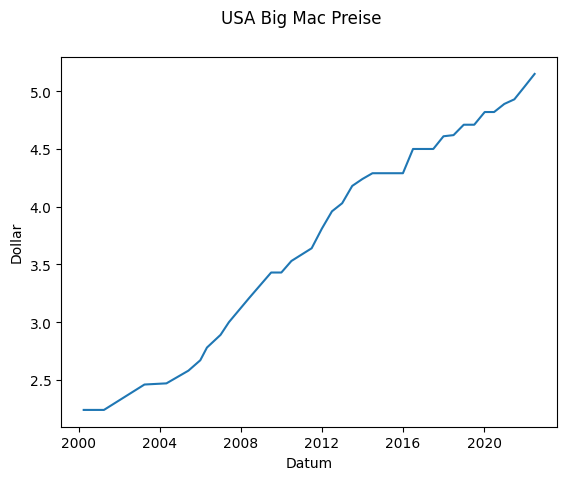

In [15]:
usa_fig, usa_ax = plt.subplots()
usa_fig.suptitle('USA Big Mac Preise')
usa_ax.set_ylabel('Dollar')
usa_ax.set_xlabel('Datum')
usa_ax.plot(usa_daten['Datum'], usa_daten['Preis'])

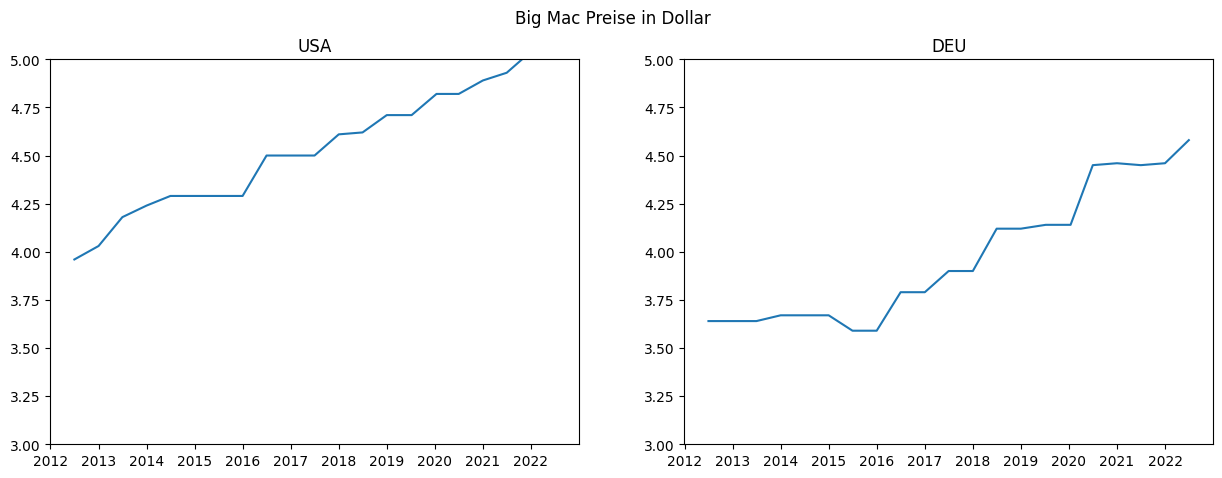

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Big Mac Preise in Dollar')

axs[0].set_ylim([3,5])
axs[1].set_ylim([3,5])

axs[0].set_title('USA')
axs[1].set_title('DEU')

axs[0].plot(usa_daten[usa_daten['Datum'] > '2012']['Datum'], usa_daten[usa_daten['Datum'] > '2012']['DP'])

ger_daten = daten[daten['Land'] == 'Germany']

axs[1].plot(ger_daten[ger_daten['Datum'] > '2012']['Datum'], ger_daten[ger_daten['Datum'] > '2012']['DP'])

# import matplotlib.dates as mdates
# axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [17]:
daten.groupby(['Land']).max()

,Datum,Währung,Preis,DK,DP
Land,,,,,
Argentina,2022-07-01,ARS,590.00,129,5.00
Australia,2022-07-01,AUD,6.70,1,6.70
Austria,2022-07-01,EUR,4.35,1,4.35
Azerbaijan,2022-07-01,AZN,4.70,1,4.70
Bahrain,2022-07-01,BHD,1.60,1,1.60
...,...,...,...,...,...
United Arab Emirates,2022-07-01,AED,18.00,3,6.00
United States,2022-07-01,USD,5.15,1,5.15
Uruguay,2022-07-01,UYU,255.00,44,6.22


In [18]:
daten['Währung'].unique()

array(['ARS', 'AUD', 'BRL', 'GBP', 'CAD', 'CLP', 'CNY', 'CZK', 'DKK',
       'EUR', 'HKD', 'HUF', 'IDR', 'ILS', 'JPY', 'MYR', 'MXN', 'NZD',
       'PLN', 'RUB', 'SGD', 'ZAR', 'KRW', 'SEK', 'CHF', 'TWD', 'THB',
       'USD', 'PHP', 'NOK', 'PEN', 'TRY', 'VEF', 'EGP', 'COP', 'CRC',
       'PKR', 'SAR', 'LKR', 'UAH', 'UYU', 'AED', 'INR', 'VND', 'AZN',
       'BHD', 'HRK', 'GTQ', 'HNL', 'JOD', 'KWD', 'LBP', 'MDL', 'NIO',
       'OMR', 'QAR', 'RON', 'VES'], dtype=object)

In [19]:
daten.groupby('Währung').nunique()

,Datum,Land,Preis,DK,DP
Währung,,,,,
AED,31,2,9,1,9
ARS,37,1,25,22,30
AUD,37,1,24,1,24
AZN,9,1,3,1,3
BHD,9,1,4,1,4
BRL,37,1,28,5,28
CAD,37,1,28,1,28
CHF,37,1,4,1,4
CLP,37,1,23,36,35


In [20]:
daten.loc[:,['Land', 'Preis']].head()

,Land,Preis
0,Argentina,2.50
1,Australia,2.59
2,Brazil,2.95
3,Britain,1.90
4,Canada,2.85


In [21]:
daten.loc[:,['Land', 'Preis']].groupby(pd.Grouper('Land')).mean()

,Preis
Land,
Argentina,81.174595
Australia,4.823378
Brazil,12.189730
Britain,2.670541
Canada,5.121892
...,...
Qatar,12.777778
Romania,9.922222
Slovakia,3.500000


In [22]:
daten.loc[(daten['Währung'] == 'EUR') & (daten['Land'] != 'Euro area')]

,Datum,Währung,Land,Preis,DK,DP
522,2011-07-01,EUR,Austria,3.09,1,3.09
523,2011-07-01,EUR,Belgium,3.75,1,3.75
534,2011-07-01,EUR,Estonia,2.20,1,2.20
536,2011-07-01,EUR,Finland,3.75,1,3.75
537,2011-07-01,EUR,France,3.50,1,3.50
...,...,...,...,...,...,...
1916,2022-07-01,EUR,Netherlands,4.50,1,4.50
1925,2022-07-01,EUR,Portugal,4.00,1,4.00
1930,2022-07-01,EUR,Slovakia,3.90,1,3.90
1931,2022-07-01,EUR,Slovenia,3.20,1,3.20


In [23]:
daten[daten.Land == 'China']

,Datum,Währung,Land,Preis,DK,DP
6,2000-04-01,CNY,China,9.90,8,1.24
34,2001-04-01,CNY,China,9.90,8,1.24
62,2002-04-01,CNY,China,10.50,8,1.31
95,2003-04-01,CNY,China,9.90,8,1.24
127,2004-05-01,CNY,China,10.40,8,1.30
167,2005-06-01,CNY,China,10.50,8,1.31
208,2006-01-01,CNY,China,10.50,8,1.31
240,2006-05-01,CNY,China,10.50,8,1.31
281,2007-01-01,CNY,China,11.00,7,1.57
322,2007-06-01,CNY,China,11.00,7,1.57


In [24]:
daten.index = daten['Datum']

In [25]:
daten.dtypes

Datum      datetime64[ns]
Währung            object
Land               object
Preis             float64
DK                  int64
DP                float64
dtype: object

In [26]:
daten.head()

,Datum,Währung,Land,Preis,DK,DP
Datum,,,,,,
2000-04-01,2000-04-01,ARS,Argentina,2.50,1,2.50
2000-04-01,2000-04-01,AUD,Australia,2.59,1,2.59
2000-04-01,2000-04-01,BRL,Brazil,2.95,1,2.95
2000-04-01,2000-04-01,GBP,Britain,1.90,1,1.90
2000-04-01,2000-04-01,CAD,Canada,2.85,1,2.85


<Axes: title={'center': 'China Big Mac Preise'}, xlabel='Datum', ylabel='RMB'>

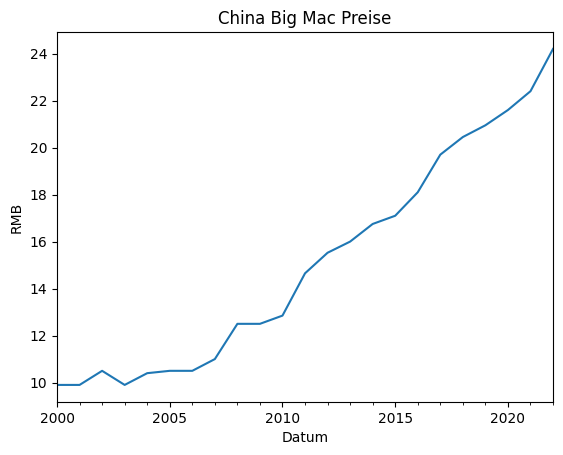

In [27]:
daten[daten['Land'] == 'China'].groupby(pd.Grouper(freq='YE'))['Preis'].mean().plot(xlabel='Datum', ylabel='RMB', title='China Big Mac Preise')

In [28]:
daten.groupby(pd.Grouper('DP', freq='YE')).max()['Land'].value_counts()

Land
Venezuela        9
Vietnam          9
Uruguay          3
United States    2
Name: count, dtype: int64

<BarContainer object of 4 artists>

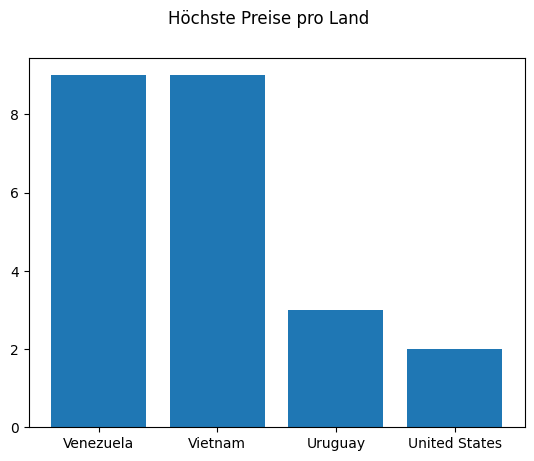

In [29]:
fig, ax = plt.subplots()
x = daten.groupby(pd.Grouper('DP', freq='YE')).max()['Land'].value_counts().index
y = daten.groupby(pd.Grouper('DP', freq='YE')).max()['Land'].value_counts()
fig.suptitle('Höchste Preise pro Land')
ax.bar(x, y)

In [30]:
usa_preise = daten.loc[daten['Land'] == 'United States'].groupby(pd.Grouper(freq='YE'))['Preis'].mean()

In [31]:
pd.date_range(usa_preise.index.values[0], usa_preise.index.values[-1], freq='YE-JAN')

DatetimeIndex(['2001-01-31', '2002-01-31', '2003-01-31', '2004-01-31',
               '2005-01-31', '2006-01-31', '2007-01-31', '2008-01-31',
               '2009-01-31', '2010-01-31', '2011-01-31', '2012-01-31',
               '2013-01-31', '2014-01-31', '2015-01-31', '2016-01-31',
               '2017-01-31', '2018-01-31', '2019-01-31', '2020-01-31',
               '2021-01-31', '2022-01-31'],
              dtype='datetime64[ns]', freq='YE-JAN')

In [32]:
jahre = pd.DataFrame(pd.Timestamp.today().year - pd.to_datetime(usa_preise.index.values).year)

In [33]:
jahre.index = usa_preise.index
jahre.columns = ['Jahre']

In [34]:
zinsen = pd.Series(np.full((len(jahre)), 0.03))
zinsen.index = jahre.index
zinsen = pd.DataFrame(zinsen, columns=['Zinsen'])
print(zinsen.head())
print(zinsen.shape)

            Zinsen
Datum             
2000-12-31    0.03
2001-12-31    0.03
2002-12-31    0.03
2003-12-31    0.03
2004-12-31    0.03
(23, 1)


In [35]:
usa_preise = pd.DataFrame(usa_preise)
jahre = pd.DataFrame(jahre)
print(usa_preise.shape)
print(jahre.shape)

(23, 1)
(23, 1)


In [36]:
usa_preise = pd.DataFrame({'Preise': usa_preise.Preis, 'Zinsen': zinsen.Zinsen, 'Jahre': jahre.Jahre}, index=jahre.index)

In [37]:
usa_preise.tail()

,Preise,Zinsen,Jahre
Datum,,,
2018-12-31,4.615,0.03,6
2019-12-31,4.710,0.03,5
2020-12-31,4.820,0.03,4
2021-12-31,4.910,0.03,3
2022-12-31,5.095,0.03,2


In [38]:
neu_daten = pd.DataFrame(np.array(([5.5, 0.03, 1],
                               [5.69, 0.03, 0])))

neu_daten.index = [pd.Timestamp(day=31, month=12, year=2023), pd.Timestamp(day=31, month=12, year=2024)]

In [39]:
neu_daten.columns = usa_preise.columns

In [40]:
usa_preise = pd.concat([usa_preise, neu_daten], join='outer')

In [41]:
def inflation(data: pd.Series):
    return data.iloc[0] * (1 + data.iloc[1]) ** data.iloc[2]

In [42]:
inflation(pd.Series((10, 0.01, 10)))

np.float64(11.046221254112044)

In [43]:
usa_preise.apply(inflation, axis=1)

2000-12-31    4.553459
2001-12-31    4.420834
2002-12-31    4.502843
2003-12-31    4.576325
2004-12-31    4.461095
2005-12-31    4.524046
2006-12-31    4.639130
2007-12-31    4.867636
2008-12-31    5.151108
2009-12-31    5.343828
2010-12-31    5.263812
2011-12-31    5.345463
2012-12-31    5.539081
2013-12-31    5.682280
2014-12-31    5.731803
2015-12-31    5.597477
2016-12-31    5.567455
2017-12-31    5.534432
2018-12-31    5.510551
2019-12-31    5.460181
2020-12-31    5.424952
2021-12-31    5.365290
2022-12-31    5.405286
2023-12-31    5.665000
2024-12-31    5.690000
dtype: float64

In [44]:
daten.loc[daten['Land'] == 'United States'].groupby(pd.Grouper(freq='YE'))['Preis'].mean().head()

Datum
2000-12-31    2.24
2001-12-31    2.24
2002-12-31    2.35
2003-12-31    2.46
2004-12-31    2.47
Freq: YE-DEC, Name: Preis, dtype: float64

In [45]:
inflation(usa_preise.iloc[1])

np.float64(4.420833784923597)

In [46]:
usa_preise['Inflation'] = usa_preise.apply(inflation, axis=1)

In [47]:
usa_preise

,Preise,Zinsen,Jahre,Inflation
2000-12-31,2.240,0.03,24.0,4.553459
2001-12-31,2.240,0.03,23.0,4.420834
2002-12-31,2.350,0.03,22.0,4.502843
2003-12-31,2.460,0.03,21.0,4.576325
2004-12-31,2.470,0.03,20.0,4.461095
2005-12-31,2.580,0.03,19.0,4.524046
2006-12-31,2.725,0.03,18.0,4.639130
2007-12-31,2.945,0.03,17.0,4.867636
2008-12-31,3.210,0.03,16.0,5.151108
2009-12-31,3.430,0.03,15.0,5.343828


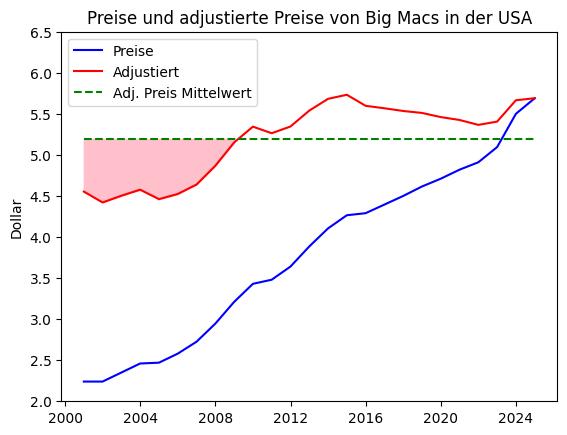

In [48]:
fig, ax = plt.subplots()
zeit = usa_preise.index
mean_adj_preise = np.full((len(zeit),), usa_preise['Inflation'].mean())

ax.set_title('Preise und adjustierte Preise von Big Macs in der USA')
ax.set_ylim((2,6.5))
ax.plot(zeit, usa_preise['Preise'], color='blue', label='Preise')
ax.plot(zeit, usa_preise['Inflation'], color='red', label='Adjustiert')
ax.plot(zeit, mean_adj_preise, linestyle='--', color='green', label='Adj. Preis Mittelwert')

ax.fill_between(zeit, usa_preise['Inflation'], mean_adj_preise, color='pink', where=usa_preise['Inflation'] < mean_adj_preise)
ax.set_ylabel('Dollar')
ax.legend(loc='upper left')

In [67]:
infla = pd.read_csv('C:\\Users\\pat_h\\OneDrive\\p-spohr-repos\\HTW-Berlin-Pytorium\\daten\\inflation.csv', header='infer')

In [68]:
infla = infla.drop(columns=['Year', 'HALF1', 'HALF2'])

In [69]:
infla.index = usa_preise.index

In [72]:
infla = infla.mean(axis=1)

In [79]:
usa_preise['Zinsen'] = infla / 100

In [83]:
usa_preise['Zinsen'].mean()

np.float64(0.023883333333333326)

In [80]:
usa_preise['Inflation'] = usa_preise.apply(inflation, axis=1)

In [81]:
usa_preise

,Preise,Zinsen,Jahre,Inflation
2000-12-31,2.240,0.024333,24.0,3.988773
2001-12-31,2.240,0.026583,23.0,4.095574
2002-12-31,2.350,0.023167,22.0,3.889451
2003-12-31,2.460,0.014500,21.0,3.328344
2004-12-31,2.470,0.017667,20.0,3.505968
2005-12-31,2.580,0.021667,19.0,3.876993
2006-12-31,2.725,0.024917,18.0,4.243855
2007-12-31,2.945,0.023250,17.0,4.352864
2008-12-31,3.210,0.023083,16.0,4.624675
2009-12-31,3.430,0.016917,15.0,4.411381


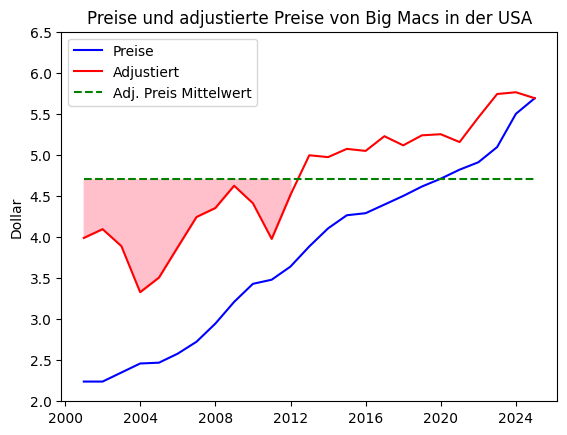

In [82]:
fig, ax = plt.subplots()
zeit = usa_preise.index
mean_adj_preise = np.full((len(zeit),), usa_preise['Inflation'].mean())

ax.set_title('Preise und adjustierte Preise von Big Macs in der USA')
ax.set_ylim((2,6.5))
ax.plot(zeit, usa_preise['Preise'], color='blue', label='Preise')
ax.plot(zeit, usa_preise['Inflation'], color='red', label='Adjustiert')
ax.plot(zeit, mean_adj_preise, linestyle='--', color='green', label='Adj. Preis Mittelwert')

ax.fill_between(zeit, usa_preise['Inflation'], mean_adj_preise, color='pink', where=usa_preise['Inflation'] < mean_adj_preise)
ax.set_ylabel('Dollar')
ax.legend(loc='upper left')